# Style Transfer

This notebooks is based on the HuggingFace space available here: https://huggingface.co/spaces/Hexii/Neural-Style-Transfer/blob/main/app.py and the code description available here: https://www.kaggle.com/models/google/arbitrary-image-stylization-v1/tensorFlow1/256/2?tfhub-redirect=true

It is a demonstration on how one can transfer to a local computer a demo app running remotely.

To run this notebook, you will need Tensorflow. You can create yet another environment using:

```
conda create -n neuralTF python=3.12 matplotlib jupyterlab
pip install tensorflow tensorflow_hub
```

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import numpy as np

/Users/gw18g940/miniforge3/envs/neuralTF/lib/python3.12/site-packages/tensorflow_hub/__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [2]:
style_weight = 0.9

In [3]:
# Load content and style images (see example in the attached colab).
content_image = plt.imread('data/woody_bulle.JPG')
style_image = plt.imread('data/Static Dynamic Gradation.jpeg')

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.

# Apply style weight to the style image
style_image = tf.image.adjust_contrast(style_image, style_weight)

# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

With style weight of 0.9:

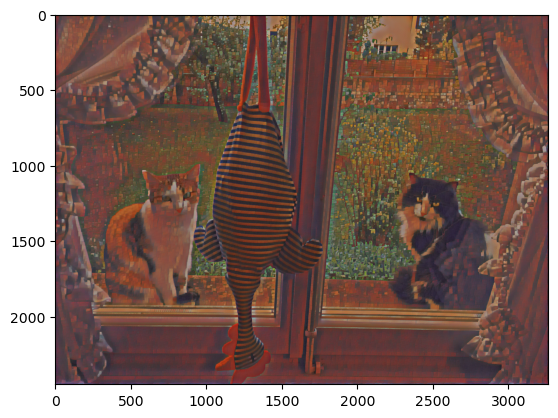

In [4]:
plt.imshow(stylized_image[0]);